# Andamento dei decessi

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

data = pd.read_csv('../covid-19-marche.csv', header=0, parse_dates=True)
dead = pd.read_csv('../data/CSV/dettagli_decessi.csv', header=0, parse_dates=True)

last_update = data['data'][data.index[-1]]
last_dead = dead['data'][dead.index[-1]]

# Inhabitants by province
ABITANTI_PU = 358886
ABITANTI_AN = 471228
ABITANTI_MC = 312235
ABITANTI_FM = 172770
ABITANTI_AP = 206511

---

In [2]:
# Info
print('----- Ultimo decesso il: ' + str(last_dead) + ' -----')
print('\n- Decessi ogni 100.000 abitanti: ' + str((dead['id'].max() / (ABITANTI_PU + ABITANTI_AN + ABITANTI_MC + ABITANTI_FM + ABITANTI_AP) * 100000)))
print('- Rapporto casi totali e decessi: ' + str(data['decessi_totali_decessi'].max() / data['malati_totali_persone'].max() * 100))
print('- Età media dei decessi: ' + str(int(dead['eta'].mean())))
print('- Percentuale decessi con patologie pregresse: ' + str(len(dead[dead['pregresse_patologie'] == 1]) / dead['id'].max() * 100) + ' %')
print('- Decessi con età inferiore ai 50 anni: ' + str(len(dead[dead['eta'] <= 50])))
print('- Più anziano deceduto: ' + str(dead['eta'].max()))
print('- Più giovane deceduto: ' + str(dead['eta'].min()))

----- Ultimo decesso il: 05-29-2020 -----

- Decessi ogni 100.000 abitanti: 65.58756070792506
- Rapporto casi totali e decessi: 14.820871116396612
- Età media dei decessi: 80
- Percentuale decessi con patologie pregresse: 94.98997995991984 %
- Decessi con età inferiore ai 50 anni: 13
- Più anziano deceduto: 100
- Più giovane deceduto: 27


---

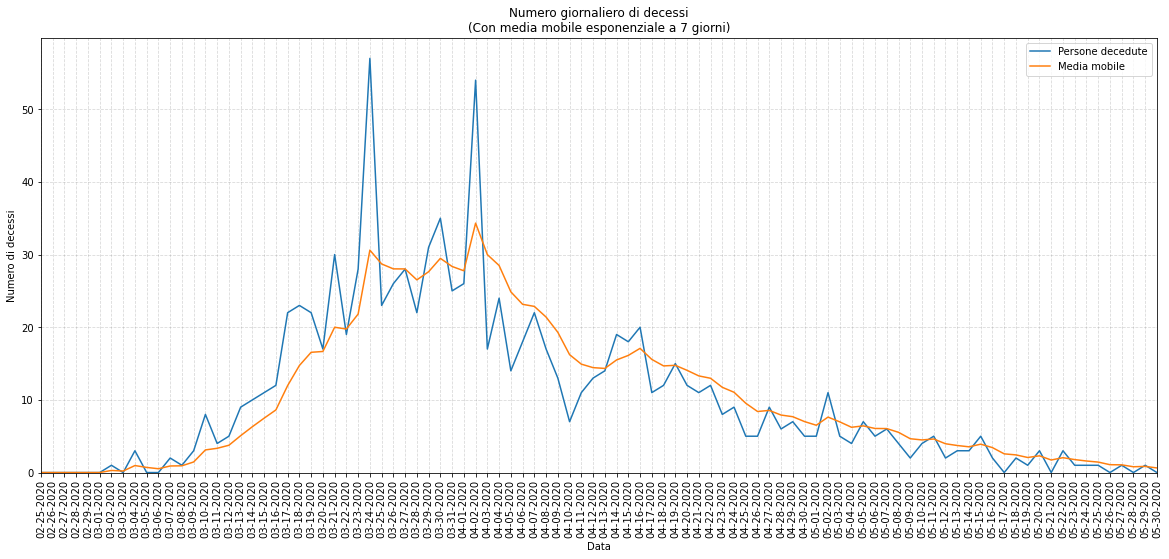

In [3]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['decessi_odierni_decessi'], label='Persone decedute')
ax.plot(data['data'], data['decessi_odierni_decessi'].ewm(span=7).mean(), label='Media mobile')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di decessi')
info = '\n(Con media mobile esponenziale a 7 giorni)'
ax.set_title('Numero giornaliero di decessi' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=0)
plt.savefig('images/andamento-decessi-01.png', bbox_inches='tight')
plt.show()

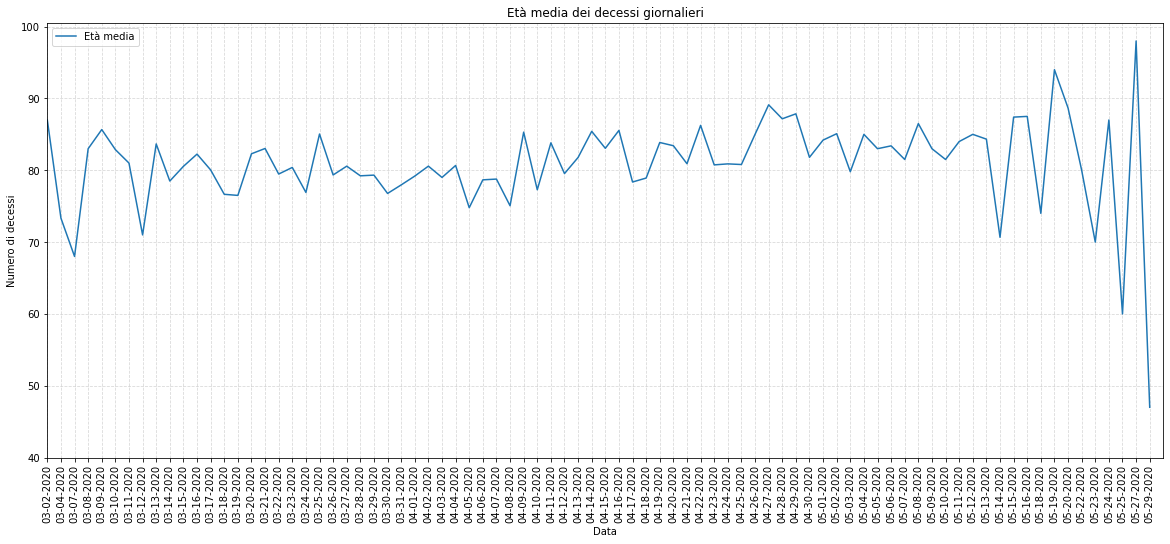

In [4]:
eta_media = dead.set_index('data').groupby(level='data')['eta'].mean()
date_trascorse = dead['data'].unique()

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_trascorse, eta_media, label='Età media')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di decessi')
ax.set_title('Età media dei decessi giornalieri')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(date_trascorse, date_trascorse, rotation='vertical')
plt.xlim(left=0, right=last_update)
plt.ylim(bottom=40)
plt.savefig('images/andamento-decessi-02.png', bbox_inches='tight')
plt.show()

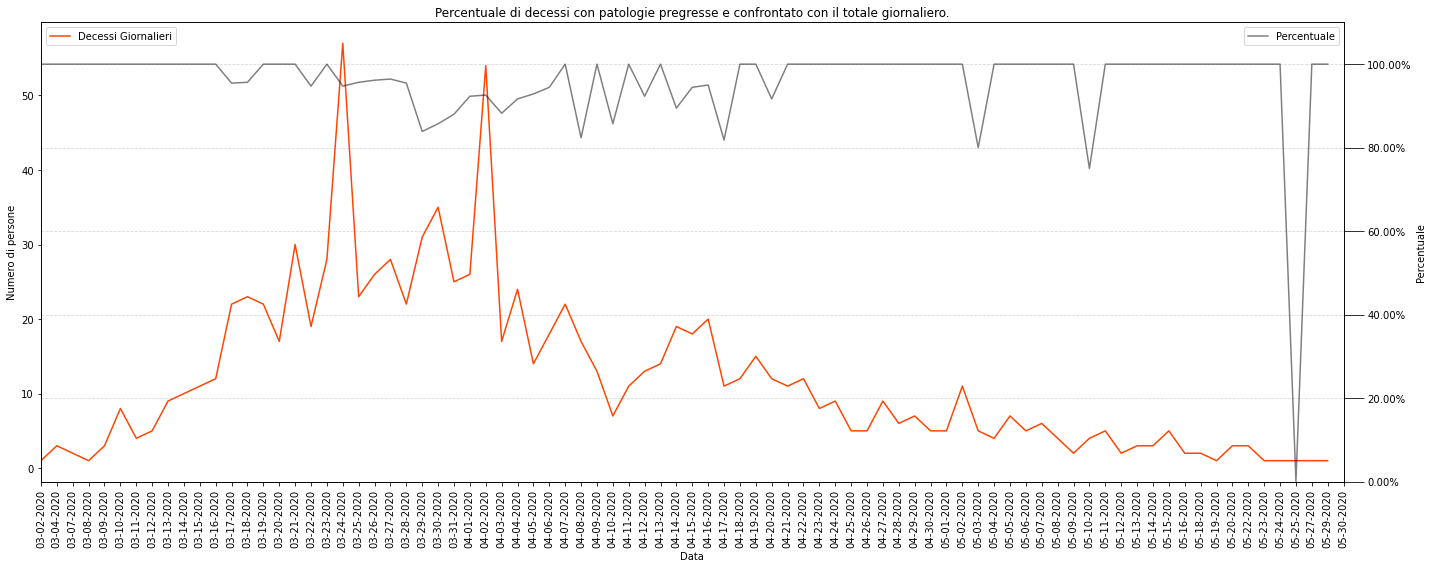

In [5]:
pregresse_patologie = dead.set_index('data').groupby(level='data')['pregresse_patologie'].sum()
decessi_giornalieri = dead.set_index('data').groupby(level='data')['id'].count()
percentuale = pregresse_patologie / decessi_giornalieri
date_trascorse = dead['data'].unique()

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Data')
ax1.set_ylabel('Numero di persone')
ax1.plot(date_trascorse, decessi_giornalieri, label='Decessi Giornalieri', color='orangered')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentuale')
ax2.plot(date_trascorse, percentuale, color='black', label='Percentuale', alpha=0.5)
ax2.tick_params(axis='y', length=20)
ax2.set_ylim(top=1.1, bottom=0)
ax2.legend(loc='upper right')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Percentuale di decessi con patologie pregresse e confrontato con il totale giornaliero.')
fig.tight_layout()

ax2.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xlim(left=0, right=last_update)
plt.savefig('images/andamento-decessi-03.png', bbox_inches='tight')
plt.show()

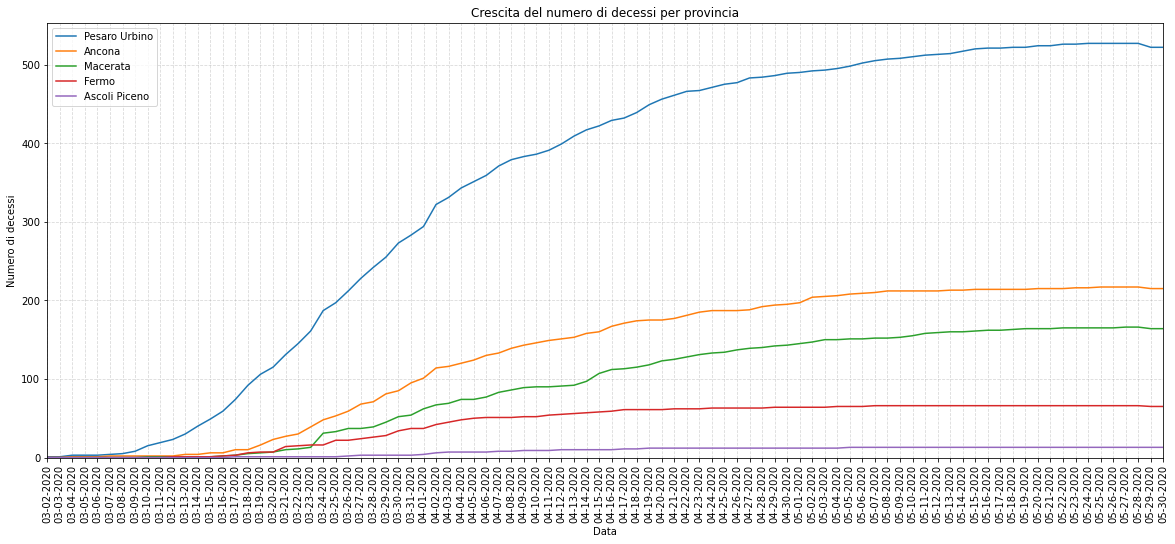

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['decessi_totali_provincia_pesaro_urbino'], label='Pesaro Urbino')
ax.plot(data['data'], data['decessi_totali_provincia_ancona'], label='Ancona')
ax.plot(data['data'], data['decessi_totali_provincia_macerata'], label='Macerata')
ax.plot(data['data'], data['decessi_totali_provincia_fermo'], label='Fermo')
ax.plot(data['data'], data['decessi_totali_provincia_ascoli_piceno'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di decessi')
ax.set_title('Crescita del numero di decessi per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=6, right=last_update) # Remove data from 25-02 to 03-01
plt.ylim(bottom=0)
plt.savefig('images/andamento-decessi-04.png', bbox_inches='tight')
plt.show()

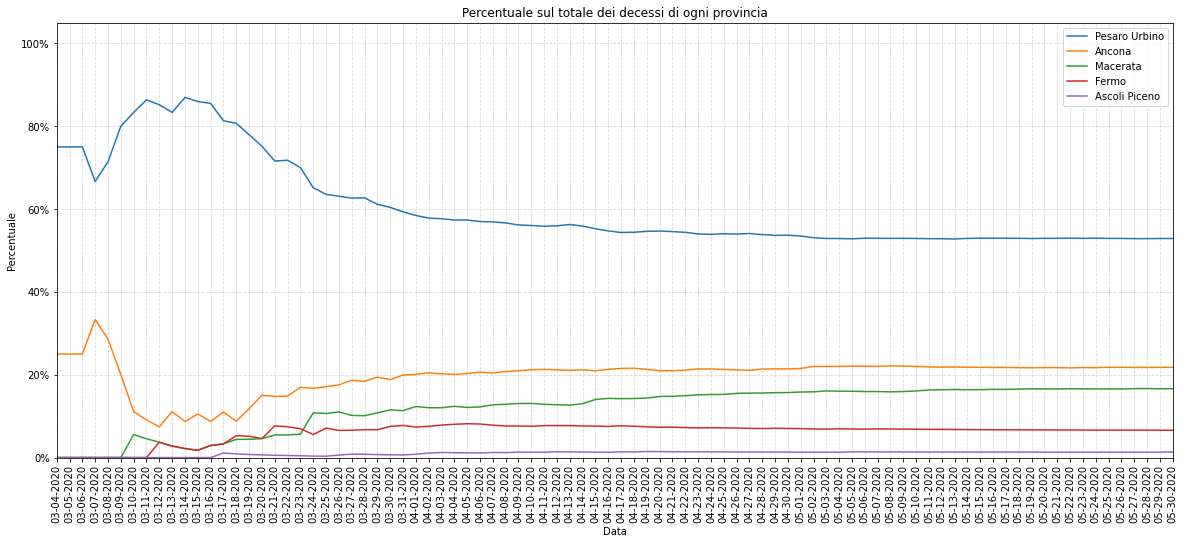

In [7]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['decessi_totali_provincia_pesaro_urbino'] / data['decessi_totali_decessi'] * 100, label='Pesaro Urbino')
ax.plot(data['data'], data['decessi_totali_provincia_ancona'] / data['decessi_totali_decessi'] * 100, label='Ancona')
ax.plot(data['data'], data['decessi_totali_provincia_macerata'] / data['decessi_totali_decessi'] * 100, label='Macerata')
ax.plot(data['data'], data['decessi_totali_provincia_fermo'] / data['decessi_totali_decessi'] * 100, label='Fermo')
ax.plot(data['data'], data['decessi_totali_provincia_ascoli_piceno'] / data['decessi_totali_decessi'] * 100, label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Percentuale')
ax.set_title('Percentuale sul totale dei decessi di ogni provincia')
ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-decessi-05.png', bbox_inches='tight')
plt.show()

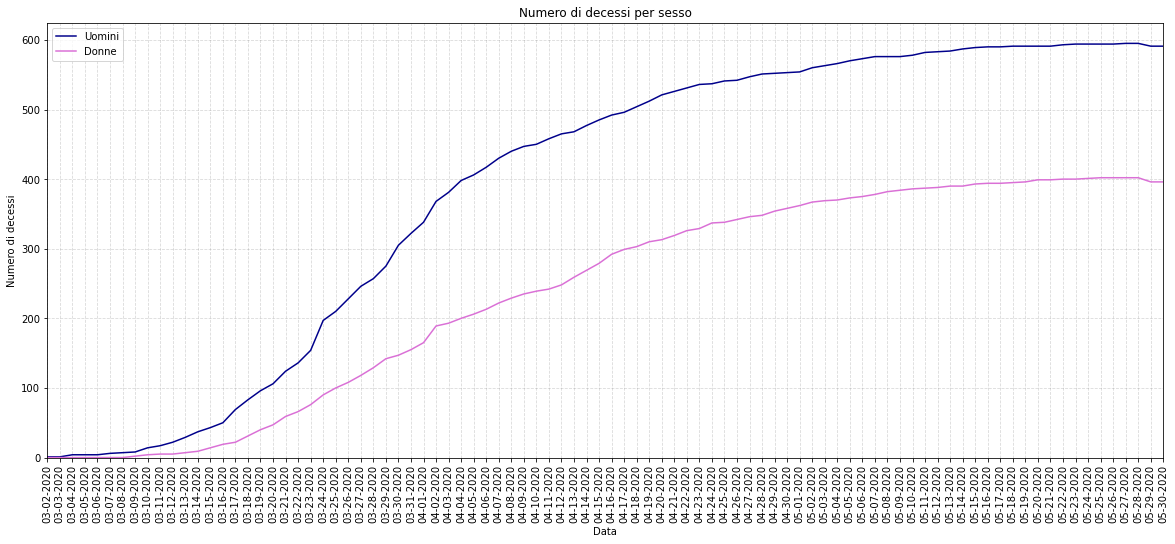

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['decessi_totali_sesso_maschio'], label='Uomini', color='darkblue')
ax.plot(data['data'], data['decessi_totali_sesso_femmina'], label='Donne', color='orchid')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di decessi')
ax.set_title('Numero di decessi per sesso')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=6, right=last_update) # Remove data from 25-02 to 03-01
plt.ylim(bottom=0)
plt.savefig('images/andamento-decessi-06.png', bbox_inches='tight')
plt.show()

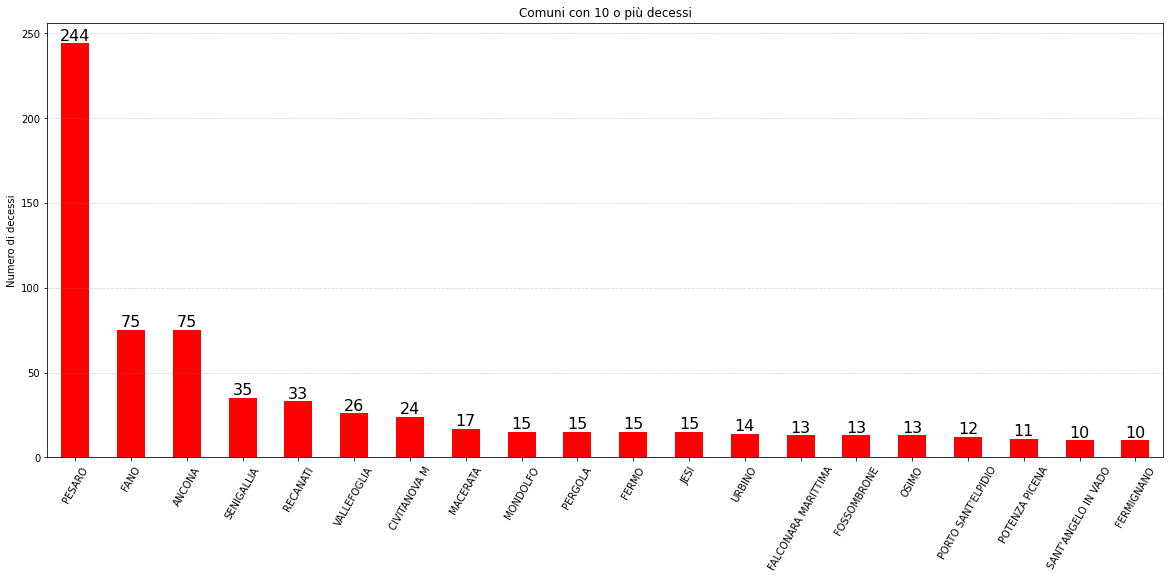

In [9]:
fig, ax = plt.subplots(figsize=(20,8))

decessi_comuni = dead['comune_domicilio'].value_counts()
decessi_comuni = decessi_comuni[decessi_comuni >= 10]

decessi_comuni.plot(kind='bar', color='red')
ax.set_title('Comuni con 10 o più decessi')
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

for i, v in enumerate(decessi_comuni):
    ax.text(i, decessi_comuni[i]+2, decessi_comuni[i], fontsize=16, color='black', horizontalalignment='center')

ax.set_ylabel('Numero di decessi')
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation=60)
plt.savefig('images/andamento-decessi-07.png', bbox_inches='tight')
plt.show()

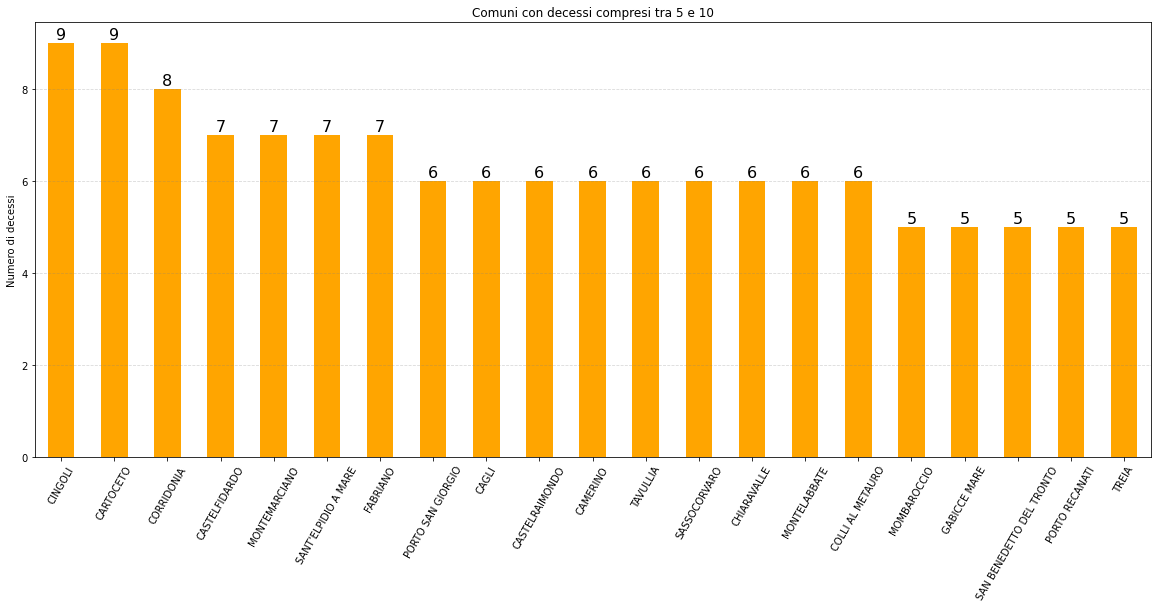

In [10]:
fig, ax = plt.subplots(figsize=(20,8))

decessi_comuni = dead['comune_domicilio'].value_counts()
decessi_comuni = decessi_comuni[(decessi_comuni >= 5) & (decessi_comuni < 10)]

decessi_comuni.plot(kind='bar', color='orange')
ax.set_title('Comuni con decessi compresi tra 5 e 10')
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

for i, v in enumerate(decessi_comuni):
    ax.text(i, decessi_comuni[i]+0.08, decessi_comuni[i], fontsize=16, color='black', horizontalalignment='center')

ax.set_ylabel('Numero di decessi')
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation=60)
plt.savefig('images/andamento-decessi-08.png', bbox_inches='tight')
plt.show()

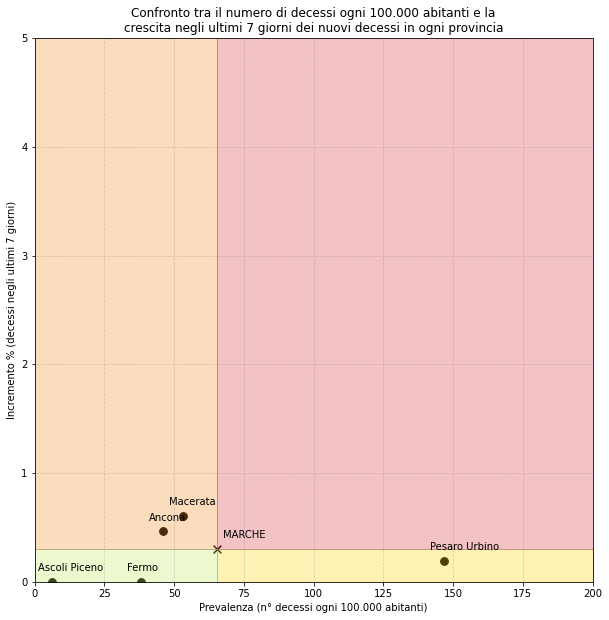

In [11]:
decessi_100k_abitanti_pu = (data['decessi_totali_provincia_pesaro_urbino'].max() / ABITANTI_PU) * 100000
decessi_100k_abitanti_an = (data['decessi_totali_provincia_ancona'].max() / ABITANTI_AN) * 100000
decessi_100k_abitanti_mc = (data['decessi_totali_provincia_macerata'].max() / ABITANTI_MC) * 100000
decessi_100k_abitanti_fm = (data['decessi_totali_provincia_fermo'].max() / ABITANTI_FM) * 100000
decessi_100k_abitanti_ap = (data['decessi_totali_provincia_ascoli_piceno'].max() / ABITANTI_AP) * 100000

incremento_percentuale_7_giorni_pu = (data['decessi_totali_provincia_pesaro_urbino'].max() - data[-8:-7]['decessi_totali_provincia_pesaro_urbino']) / data[-8:-7]['decessi_totali_provincia_pesaro_urbino'] * 100
incremento_percentuale_7_giorni_an = (data['decessi_totali_provincia_ancona'].max() - data[-8:-7]['decessi_totali_provincia_ancona']) / data[-8:-7]['decessi_totali_provincia_ancona'] * 100
incremento_percentuale_7_giorni_mc = (data['decessi_totali_provincia_macerata'].max() - data[-8:-7]['decessi_totali_provincia_macerata']) / data[-8:-7]['decessi_totali_provincia_macerata'] * 100
incremento_percentuale_7_giorni_fm = (data['decessi_totali_provincia_fermo'].max() - data[-8:-7]['decessi_totali_provincia_fermo']) / data[-8:-7]['decessi_totali_provincia_fermo'] * 100
incremento_percentuale_7_giorni_ap = (data['decessi_totali_provincia_ascoli_piceno'].max() - data[-8:-7]['decessi_totali_provincia_ascoli_piceno']) / data[-8:-7]['decessi_totali_provincia_ascoli_piceno'] * 100

X = data['decessi_totali_decessi'].max() / (ABITANTI_PU + ABITANTI_AN + ABITANTI_MC + ABITANTI_FM + ABITANTI_AP) * 100000
Y = (data['decessi_totali_decessi'].max() - data[-8:-7]['decessi_totali_decessi']) / data[-8:-7]['decessi_totali_decessi'] * 100

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(decessi_100k_abitanti_pu, incremento_percentuale_7_giorni_pu, color='black', s=60)
ax.scatter(decessi_100k_abitanti_an, incremento_percentuale_7_giorni_an, color='black', s=60)
ax.scatter(decessi_100k_abitanti_mc, incremento_percentuale_7_giorni_mc, color='black', s=60)
ax.scatter(decessi_100k_abitanti_fm, incremento_percentuale_7_giorni_fm, color='black', s=60)
ax.scatter(decessi_100k_abitanti_ap, incremento_percentuale_7_giorni_ap, color='black', s=60)
ax.scatter(X, Y, color='black', s=60, marker='x')
ax.set_xlabel('Prevalenza (n° decessi ogni 100.000 abitanti)')
ax.set_ylabel('Incremento % (decessi negli ultimi 7 giorni)')
ax.set_title('Confronto tra il numero di decessi ogni 100.000 abitanti e la\ncrescita negli ultimi 7 giorni dei nuovi decessi in ogni provincia')

ax.annotate('Pesaro Urbino', (decessi_100k_abitanti_pu, incremento_percentuale_7_giorni_pu), (decessi_100k_abitanti_pu-5, incremento_percentuale_7_giorni_pu+0.1))
ax.annotate('Ancona', (decessi_100k_abitanti_an, incremento_percentuale_7_giorni_an), (decessi_100k_abitanti_an-5, incremento_percentuale_7_giorni_an+0.1))
ax.annotate('Macerata', (decessi_100k_abitanti_mc, incremento_percentuale_7_giorni_mc), (decessi_100k_abitanti_mc-5, incremento_percentuale_7_giorni_mc+0.1))
ax.annotate('Fermo', (decessi_100k_abitanti_fm, incremento_percentuale_7_giorni_fm), (decessi_100k_abitanti_fm-5, incremento_percentuale_7_giorni_fm+0.1))
ax.annotate('Ascoli Piceno', (decessi_100k_abitanti_ap, incremento_percentuale_7_giorni_ap), (decessi_100k_abitanti_ap-5, incremento_percentuale_7_giorni_ap+0.1))
ax.annotate('MARCHE', (X, Y), (X+2, Y+0.1))

ax.axvline(X, color='gray', linestyle='solid', lw=1, alpha=0.4)
ax.axhline(float(Y), color='gray', linestyle='solid', lw=1, alpha=0.4)

ax.fill_between([0, X],0,Y,alpha=0.3, color='#c2e85c')  # blue
ax.fill_between([X, 200], 0, Y, alpha=0.3, color='#F9D307')  # yellow
ax.fill_between([0, X], Y, 200, alpha=0.3, color='#F38D25')  # orange
ax.fill_between([X, 200], Y, 200, alpha=0.3, color='#DA383D')  # red

plt.xlim(left=0, right=200)
plt.ylim(bottom=0, top=5)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.savefig('images/andamento-decessi-10.png', bbox_inches='tight')
plt.show()